# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
sequence_features = ['labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types']

In [5]:
text_features = ['administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [18]:
text_features = [ 'administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual' ,            
    'labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types']

In [19]:
categorical_features = ['date_weekday',
 'request_origin',
 'origin',
 'entity_group',
 'gender',
 'request_sector',
 'insurance_entity',
 'admission_sector',
 'emergency_service',
 'isolation',
 'ARM_TEP',
 'CEC_TEP',
 'request_sector',
 'date_weekday',
 'admission_weekday',
 'date_month',
 'admission_month']

In [20]:
numerical_features = ['PIM2TEP',
 'emergency_service',
 'high_risk_TEP',
 'hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'low_risk_TEP',
 'new_born_gestation_age',
 'new_born_weight',
 'patient_age',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count']

### All features

In [21]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                'categorical_features' : categorical_features ,
                'numerical_features' : numerical_features,
               'text_features': text_features,
                #'sequence_features':sequence_features
               }

In [22]:
lgbm_comb_features = Model(**model_params)
lgbm_comb_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming numerical features
	 Preprocessing data
	 Transforming categorical features
	 Preprocessing data
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transformi

In [23]:
lgbm_comb_features.n_features

20090

In [24]:
%%time
lgbm_comb_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.860573	validation_set's auc: 0.855093
[20]	training_set's auc: 0.868912	validation_set's auc: 0.862037
[30]	training_set's auc: 0.872509	validation_set's auc: 0.864456
[40]	training_set's auc: 0.875862	validation_set's auc: 0.866826
[50]	training_set's auc: 0.878392	validation_set's auc: 0.868032
[60]	training_set's auc: 0.880358	validation_set's auc: 0.868815
[70]	training_set's auc: 0.881986	validation_set's auc: 0.869485
[80]	training_set's auc: 0.883221	validation_set's auc: 0.869804
[90]	training_set's auc: 0.88447	validation_set's auc: 0.870154
[100]	training_set's auc: 0.885582	validation_set's auc: 0.870388
CPU times: user 1min 17s, sys: 514 ms, total: 1min 18s
Wall time: 20.8 s


In [25]:
lgbm_comb_features.get_performance_metrics()

training AUC ROC score:  0.885583525648464
validation AUC ROC score:  0.8703884493374574
relative over-fitting:  0.017158264433476296


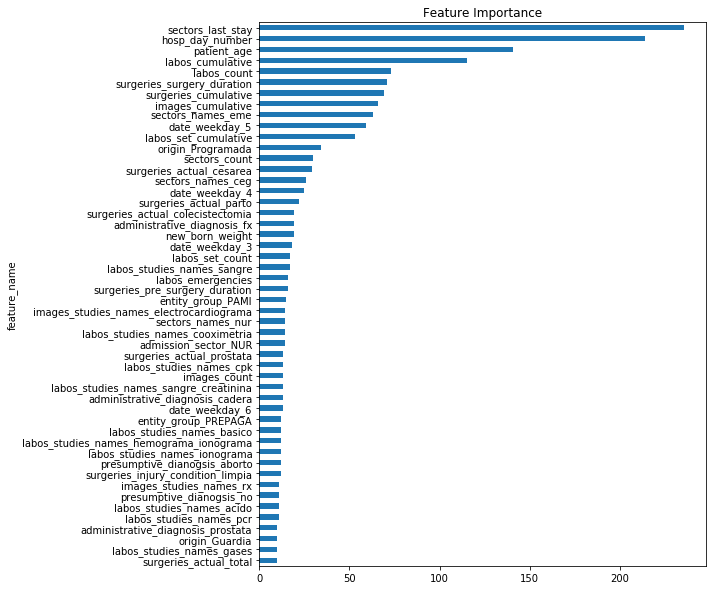

In [26]:
lgbm_comb_features.plot_feature_importance(50)

In [17]:
lgbm_param_grid = {'max_depth': [3,7,10],
                  'learning_rate': [0.1,0.01,0.001],
                  'num_iterations': [100,150,200,250]}

In [18]:
lgbm_comb_features.optimize_hyperparams(params_dict=lgbm_param_grid,
                                         n_folds=3,
                                         search_type='grid')

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.7s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   34.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  5.8min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  8.8min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 12.5min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 18.0min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 26.6min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 33.7min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 42.2min
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed: 49.0min finished


{'mean_fit_time': array([ 13.21427639,  17.31094631,  24.53345029,  32.73737661,
         29.03440237,  42.95052679,  52.53798095,  59.18845932,
         39.89304336,  43.38829549,  54.96867577,  72.7400589 ,
         15.89934063,  23.19839597,  31.63599277,  29.65309564,
         25.5002737 ,  36.94174139,  47.62450798, 104.93550968,
         58.39482745,  84.08352804, 110.99840267, 143.71551704,
         21.75785383,  34.67421738,  56.89290428,  73.487245  ,
         66.73363837,  95.42184273,  71.59542878,  69.24571904,
         32.49592002,  49.13072904,  66.60075744,  74.76265669]),
 'std_fit_time': array([ 0.4670839 ,  0.17606188,  1.58005321,  4.17326146,  3.54741453,
         0.88759846,  2.3769391 ,  1.31546052,  3.29853162,  0.48828768,
         0.87818141,  2.81362296,  0.43537245,  0.32133617,  1.25536834,
         0.95490613,  0.68112399,  0.84202635,  0.92017845, 14.81054033,
         1.83856371,  0.26853916,  1.60102352,  9.98822146,  0.79769912,
         4.45439588,  0.

In [19]:
exp_results = lgbm_comb_features.get_model_selection_results()

In [20]:
exp_results.to_csv('experiments/combined/lgb_comb_features_grid_search_results.csv')

In [21]:
best_params = lgbm_comb_features.model_selection.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 10, 'num_iterations': 200}

In [27]:
%%time
lgbm_comb_features.fit_classifier(**{'learning_rate': 0.1, 'max_depth': 10, 'num_iterations': 200})

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.863406	validation_set's auc: 0.857365
[20]	training_set's auc: 0.869725	validation_set's auc: 0.862334
[30]	training_set's auc: 0.873701	validation_set's auc: 0.865751
[40]	training_set's auc: 0.876611	validation_set's auc: 0.867713
[50]	training_set's auc: 0.879254	validation_set's auc: 0.869177
[60]	training_set's auc: 0.881209	validation_set's auc: 0.869735
[70]	training_set's auc: 0.883076	validation_set's auc: 0.870611
[80]	training_set's auc: 0.884617	validation_set's auc: 0.871103
[90]	training_set's auc: 0.88584	validation_set's auc: 0.87141
[100]	training_set's auc: 0.887036	validation_set's auc: 0.871681
[110]	training_set's auc: 0.888259	validation_set's auc: 0.871921
[120]	training_set's auc: 0.88936	validation_set's auc: 0.872275
[130]	training_set's auc: 0.890367	validation_set's auc: 0.87247
[140]	training_set's auc: 0.891355	validation_set's auc: 0.872433
[150]	training_set's auc: 0.892539	validation_set's auc: 0.872755
[160]	training_set's au

In [28]:
lgbm_comb_features.get_performance_metrics()

training AUC ROC score:  0.8966252306457049
validation AUC ROC score:  0.8734976233940943
relative over-fitting:  0.025794062514786928


In [30]:
lgbm_comb_features.n_features

20090

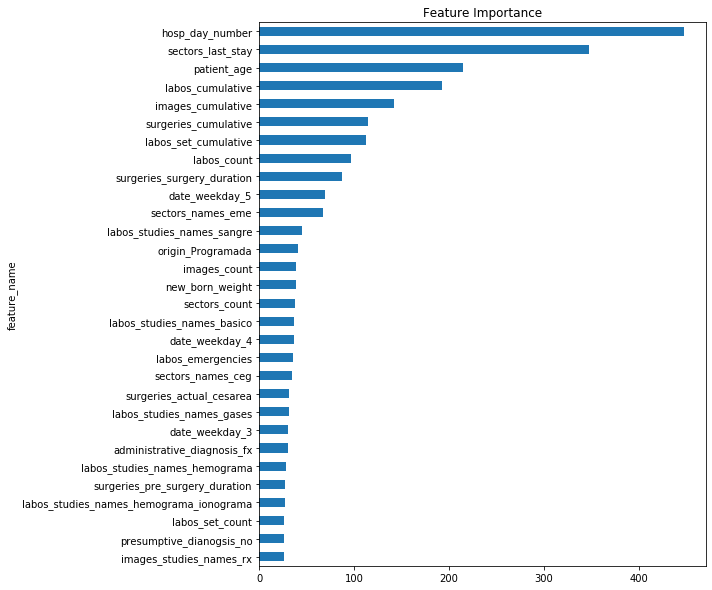

In [29]:
lgbm_comb_features.plot_feature_importance()

In [32]:
lgbm_comb_features.fit_classifier()

In [31]:
import pickle

In [32]:
outputfile ='experiments/combined/lgb_comb_features_optimized.pkl'
with open(outputfile, 'wb') as pickle_file:
    pickle.dump(lgbm_comb_features, pickle_file)

In [57]:
lgbm_comb_features.classifier.lgbm_classifier

In [40]:
import lightgbm

In [59]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(lgbm_comb_features.classifier, out_file='/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/lgb_tree.dot', 
                feature_names = [name[:10] for name in lgbm_comb_features.model_features],
                class_names = ['False','True'],
                rounded = False, proportion = False, 
                precision = 2, filled = True,impurity=False,
               rotate=False)

NotFittedError: This LGBM_classifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [51]:
lightgbm.create_tree_digraph(lgbm_comb_features.classifier.lgbm_classifier, 1,
                precision = 2, filled = True,impurity=False,
               rotate=False)

TypeError: __init__() got an unexpected keyword argument 'filled'

In [53]:
from graphviz import Digraph

In [54]:
Digraph??

In [48]:
from lightgbm.plotting import *

In [49]:
to_graphviz(lgbm_comb_features.classifier.lgbm_classifier)

NameError: name 'to_graphviz' is not defined